<a href="https://colab.research.google.com/github/ovieimara/ITNPBD4/blob/master/BD4_Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical 3: SARIMA and SARIMAX

## In this practical you will explore SARIMA forecasting, starting with airline passengers data. You will use auto_arima as before, which will search for the right SARIMA parameters.
##Follow the lecture slides
## You will need to upload airline-passengers.csv

In [3]:
%%capture
!pip install pmdarima

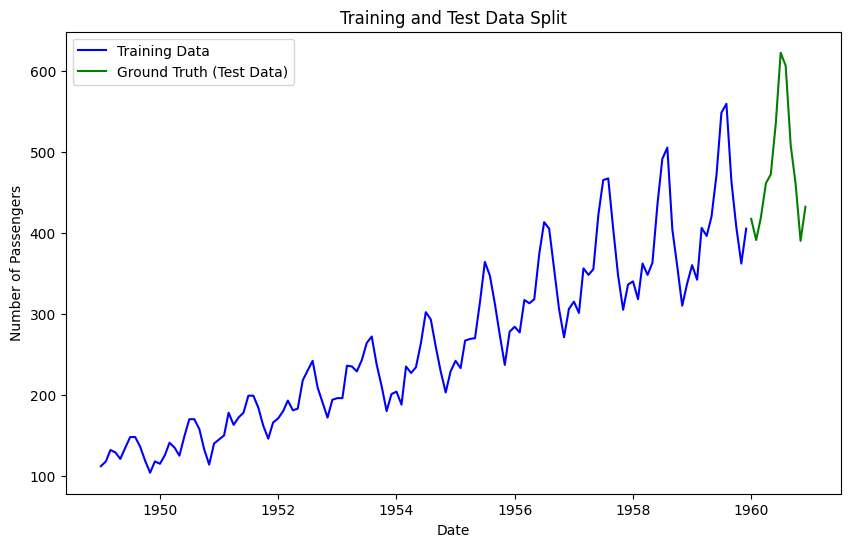

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=1.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 4.497 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observatio

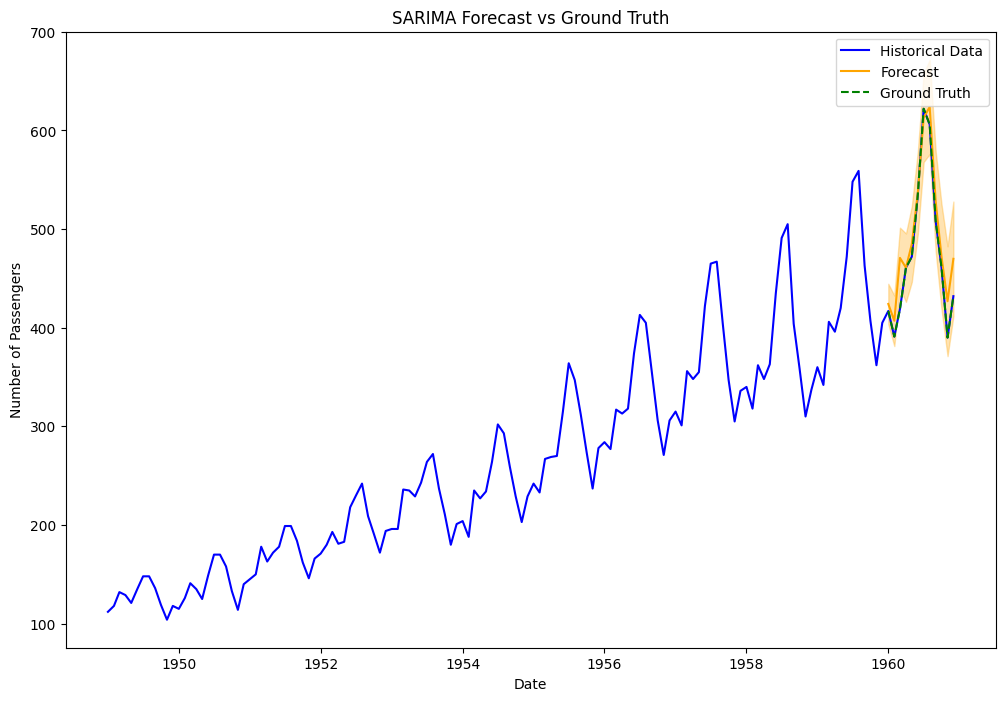

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the dataset and set the index to 'Month'
data = pd.read_csv('/content/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Split the data into training and test sets
forecast_horizon = 12  # Reserve the last 1 to 3 years for testing
train_data = data[:-forecast_horizon]
test_data = data[-forecast_horizon:]

# Plot the training data and ground truth (test data)
plt.figure(figsize=(10, 6))
plt.plot(train_data['Passengers'], label='Training Data', color='blue')
plt.plot(test_data['Passengers'], label='Ground Truth (Test Data)', color='green')
plt.title('Training and Test Data Split')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Fit the SARIMA model with automatic parameter selection on training data
sarima_model = pm.auto_arima(
    train_data['Passengers'],
    start_p=1, max_p=3,            # Non-seasonal AR terms
    start_q=1, max_q=3,            # Non-seasonal MA terms
    start_P=0, max_P=2,            # Seasonal AR terms
    start_Q=0, max_Q=2,            # Seasonal MA terms
    d=1,                           # Differencing order
    D=1,                           # Seasonal differencing order
    m=12,                          # Seasonal cycle length (12 for monthly data with yearly seasonality)
    seasonal=True,                 # Enable seasonality
    stepwise=True,                 # Enable stepwise search
    trace=True,                    # Output model selection details
    information_criterion='aic'    # Criterion for model selection
)

# Print the summary of the fitted model
print(sarima_model.summary())

# Forecast future values
n_periods = len(test_data)  # Forecast for the test set period
forecast, conf_int = sarima_model.predict(n_periods=n_periods, return_conf_int=True)

# Create a range of dates for the forecasted values
forecast_index = test_data.index

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test_data['Passengers'], forecast))
mae = mean_absolute_error(test_data['Passengers'], forecast)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot historical data, forecast, and ground truth
plt.figure(figsize=(12, 8))
plt.plot(data['Passengers'], label='Historical Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.3)
plt.plot(test_data['Passengers'], label='Ground Truth', color='green', linestyle='dashed')
plt.title('SARIMA Forecast vs Ground Truth')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


## Now you can explore the role of an external variable in the forecast
## Let's see how US GDP affected the growth in airline passengers traffic between 1949 and 1960
## You will need to upload US_GDP_future.csv
### note: GDP figures extend beyond passengers figures in terms of dates

#SARIMAX with training and testing with auto_arima trace

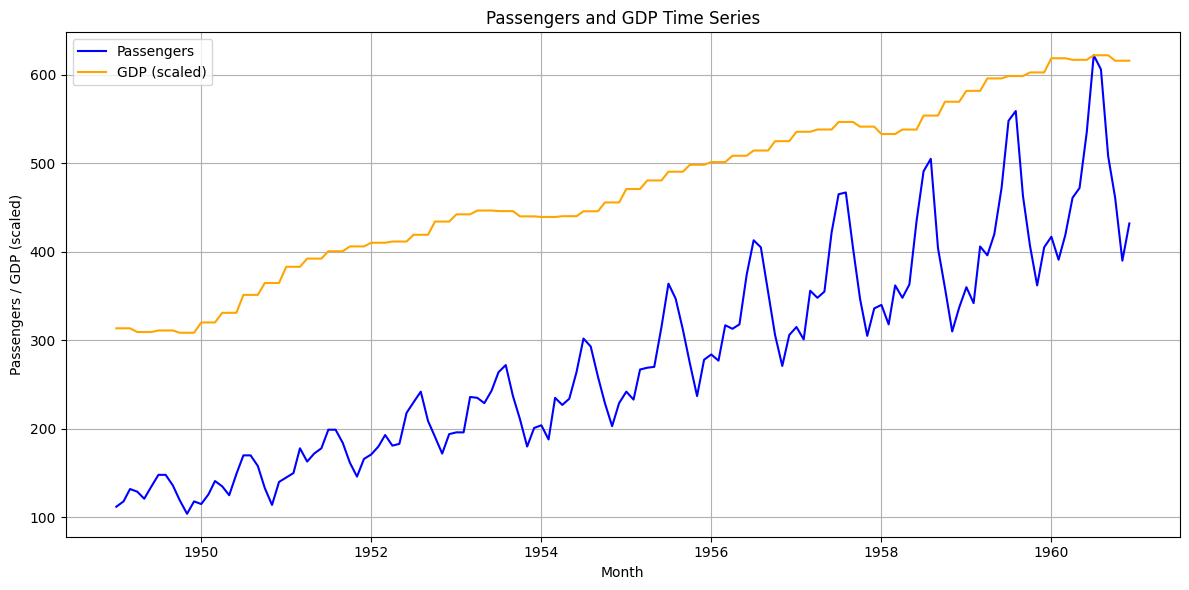

Running auto_arima to find the best parameters...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=757.714, Time=1.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.31 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.40 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.072 seconds

Optimal Order: (1, 1, 0)
Optimal Sea

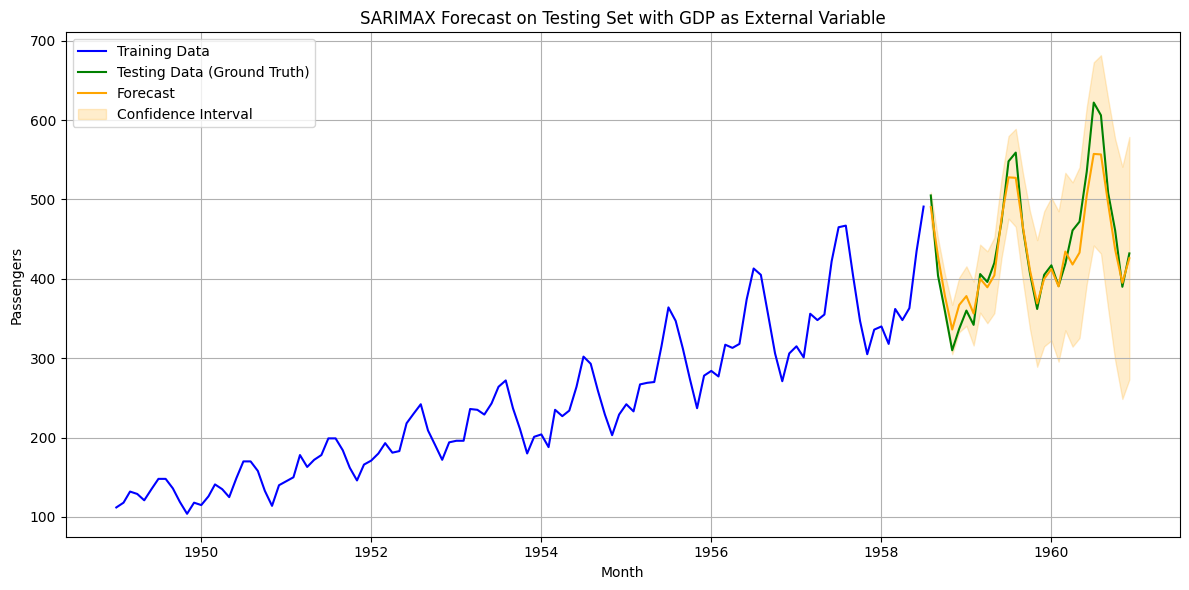

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Load the datasets
passengers_file = '/content/airline-passengers.csv'
gdp_file = '/content/US_GDP_future.csv'

# Load and preprocess the airline-passengers data
passengers_df = pd.read_csv(passengers_file)
passengers_df['Month'] = pd.to_datetime(passengers_df['Month'], format='%Y-%m')
passengers_df.set_index('Month', inplace=True)

# Load and preprocess the GDP data
gdp_df = pd.read_csv(gdp_file)
gdp_df['Month'] = pd.to_datetime(gdp_df['Month'], format='%Y-%m')
gdp_df.set_index('Month', inplace=True)

# Ensure alignment by joining on the index (Month)
combined_df = passengers_df.join(gdp_df, how='inner')

# Plotting Passengers and GDP
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Passengers'], label='Passengers', color='blue')
scaled_gdp = combined_df['GDP'] / combined_df['GDP'].max() * combined_df['Passengers'].max()
plt.plot(combined_df.index, scaled_gdp, label='GDP (scaled)', color='orange')
plt.title('Passengers and GDP Time Series')
plt.xlabel('Month')
plt.ylabel('Passengers / GDP (scaled)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Split data into training and testing sets
train_ratio = 0.8  # Use 80% of data for training
train_size = int(len(combined_df) * train_ratio)

train = combined_df.iloc[:train_size]
test = combined_df.iloc[train_size:]

# Extract the series and external variable
y_train = train['Passengers']
y_test = test['Passengers']
exog_train = train['GDP']
exog_test = test['GDP']

# Auto_arima to find the best parameters
print("Running auto_arima to find the best parameters...")
auto_model = auto_arima(
    y_train,
    exogenous=exog_train,
    seasonal=True,
    m=12,  # Monthly data
    trace=True,
    suppress_warnings=True,
    stepwise=True,
    information_criterion='aic'
)

# Best parameters from auto_arima
print(f"\nOptimal Order: {auto_model.order}")
print(f"Optimal Seasonal Order: {auto_model.seasonal_order}")
print(f"Best AIC: {auto_model.aic():.2f}")

# Fit a SARIMAX model with auto_arima parameters
sarimax_model = SARIMAX(
    y_train,
    exog=exog_train,
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order
)
sarimax_fit = sarimax_model.fit(disp=False)

# Model summary
print(sarimax_fit.summary())

# Forecasting on the test set
forecast = sarimax_fit.get_forecast(steps=len(test), exog=exog_test)
forecast_df = forecast.conf_int()
# print("forecast_df", forecast)

forecast_df['Forecast'] = forecast.predicted_mean

# Calculate MAE
mae = mean_absolute_error(y_test, forecast_df['Forecast'])
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Training Data', color='blue')
plt.plot(y_test, label='Testing Data (Ground Truth)', color='green')
plt.plot(forecast_df['Forecast'], label='Forecast', color='orange')
plt.fill_between(
    forecast_df.index,
    forecast_df['lower Passengers'],
    forecast_df['upper Passengers'],
    color='orange',
    alpha=0.2,
    label='Confidence Interval'
)
plt.title('SARIMAX Forecast on Testing Set with GDP as External Variable')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
